# 120 years of olympic history athletes and results

In [1]:
# Data Source
# https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

## Description

##### This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

#### I am planning to do analysis on Women athletes data.
#### My goal is see how women athletes have evolved over the years and performance of various nations.

#### This dataset has 2 .csv files (athlete_event and noc_region), I will combine and use both files.
#### Then I will exctract only Female records and use that data as my primary dataset.



In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib import interactive # to show all plots in notebook and interactive
interactive(True)
%matplotlib notebook

In [4]:
# Reading athlete_event and noc_region csv files

df_athlete = pd.read_csv("/Users/rsgavara/Desktop/PythonForStats/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
df_noc = pd.read_csv("/Users/rsgavara/Desktop/PythonForStats/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")


In [5]:
df_athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
df_noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,CAF,Germany,Turks and Caicos Islands
freq,1,4,1


In [7]:
sum(df_noc["NOC"].isna()) # No missing values

0

In [8]:
sum(df_noc["region"].isna()) # 3 missing values

3

In [9]:
df_noc = df_noc[~df_noc['region'].isnull()] # Removing rows with missing region info

In [10]:
df_noc.describe()

,NOC,region,notes
count,227,227,18
unique,227,206,18
top,CAF,Germany,Turks and Caicos Islands
freq,1,4,1


In [11]:
# Joining 2 data frames to make single dataframe
df = pd.merge(df_athlete, df_noc, on='NOC')
df.describe()
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270746 entries, 0 to 270745
Data columns (total 17 columns):
ID        270746 non-null int64
Name      270746 non-null object
Sex       270746 non-null object
Age       261286 non-null float64
Height    210668 non-null float64
Weight    207964 non-null float64
Team      270746 non-null object
NOC       270746 non-null object
Games     270746 non-null object
Year      270746 non-null int64
Season    270746 non-null object
City      270746 non-null object
Sport     270746 non-null object
Event     270746 non-null object
Medal     39774 non-null object
region    270746 non-null object
notes     5018 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
270741,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270742,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270743,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
270744,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN
270745,122299,Mosolesa Tsie,M,20.0,175.0,75.0,Lesotho,LES,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [12]:
# Extracting just women data 
df_w = df[df["Sex"]=='F'] 

In [13]:
# Extracting just Men data 
df_m = df[df["Sex"]=='M']

In [14]:
# Checking quick statistics of df_w
df_w.describe()

,ID,Age,Height,Weight,Year
count,74386.000000,73962.000000,67259.000000,66650.000000,74386.000000
mean,69921.070820,23.736081,167.846117,60.026677,1992.425860
std,38924.996578,5.795527,8.780677,10.215639,20.464245
min,5.000000,11.000000,127.000000,25.000000,1900.000000
25%,36517.250000,20.000000,162.000000,54.000000,1984.000000
50%,70099.000000,23.000000,168.000000,59.000000,1998.000000
75%,103496.500000,27.000000,173.000000,65.000000,2008.000000
max,135568.000000,74.000000,213.000000,167.000000,2016.000000


In [15]:
df_m.describe()

,ID,Age,Height,Weight,Year
count,196360.000000,187324.000000,143409.000000,141314.000000,196360.000000
mean,67589.738226,26.280151,178.861606,75.749041,1973.031890
std,39034.321131,6.473506,9.362402,13.213854,31.134554
min,1.000000,10.000000,127.000000,28.000000,1896.000000
25%,33861.000000,22.000000,172.000000,67.000000,1952.000000
50%,67259.500000,25.000000,179.000000,74.000000,1980.000000
75%,101615.000000,29.000000,185.000000,83.000000,2000.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [16]:
# Checking in what category Women with Age >74 participated
df_w.loc[df_w["Age"] == 74]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
59846,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
59847,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
59848,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
59849,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN


In [17]:
# From the above inspection itseems there are duplicate rows in the data frame so I am dropping dupes

df_w = df_w.drop_duplicates()
df_w.describe()

,ID,Age,Height,Weight,Year
count,74242.000000,73840.000000,67259.000000,66650.000000,74242.000000
mean,69918.483769,23.700853,167.846117,60.026677,1992.539829
std,38920.165432,5.695163,8.780677,10.215639,20.317853
min,5.000000,11.000000,127.000000,25.000000,1900.000000
25%,36518.000000,20.000000,162.000000,54.000000,1984.000000
50%,70097.000000,23.000000,168.000000,59.000000,1998.000000
75%,103493.750000,27.000000,173.000000,65.000000,2008.000000
max,135568.000000,74.000000,213.000000,167.000000,2016.000000


In [18]:
# Dropping dupe data from Men dataframe as well
df_m = df_m.drop_duplicates()
df_m.describe()

,ID,Age,Height,Weight,Year
count,195119.000000,186220.000000,143381.000000,141277.000000,195119.000000
mean,67609.875502,26.154403,178.862269,75.749457,1973.303010
std,39042.084779,6.202089,9.362117,13.215249,31.039186
min,1.000000,10.000000,127.000000,28.000000,1896.000000
25%,33869.000000,22.000000,172.000000,67.000000,1952.000000
50%,67304.000000,25.000000,179.000000,74.000000,1980.000000
75%,101657.500000,29.000000,185.000000,83.000000,2000.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [19]:
F_ID = df_w.groupby('Year')["ID"].nunique().tolist()
F_ID
M_ID = df_m.groupby('Year')["ID"].nunique().tolist()
M_ID

[176,
 1201,
 644,
 835,
 1980,
 2354,
 2598,
 3396,
 3363,
 1952,
 4701,
 4544,
 4989,
 3604,
 5255,
 5350,
 5719,
 6851,
 5707,
 4972,
 6216,
 7352,
 7962,
 1216,
 6813,
 1390,
 6571,
 1513,
 6251,
 1539,
 6277,
 1503,
 5853,
 1643,
 6129]

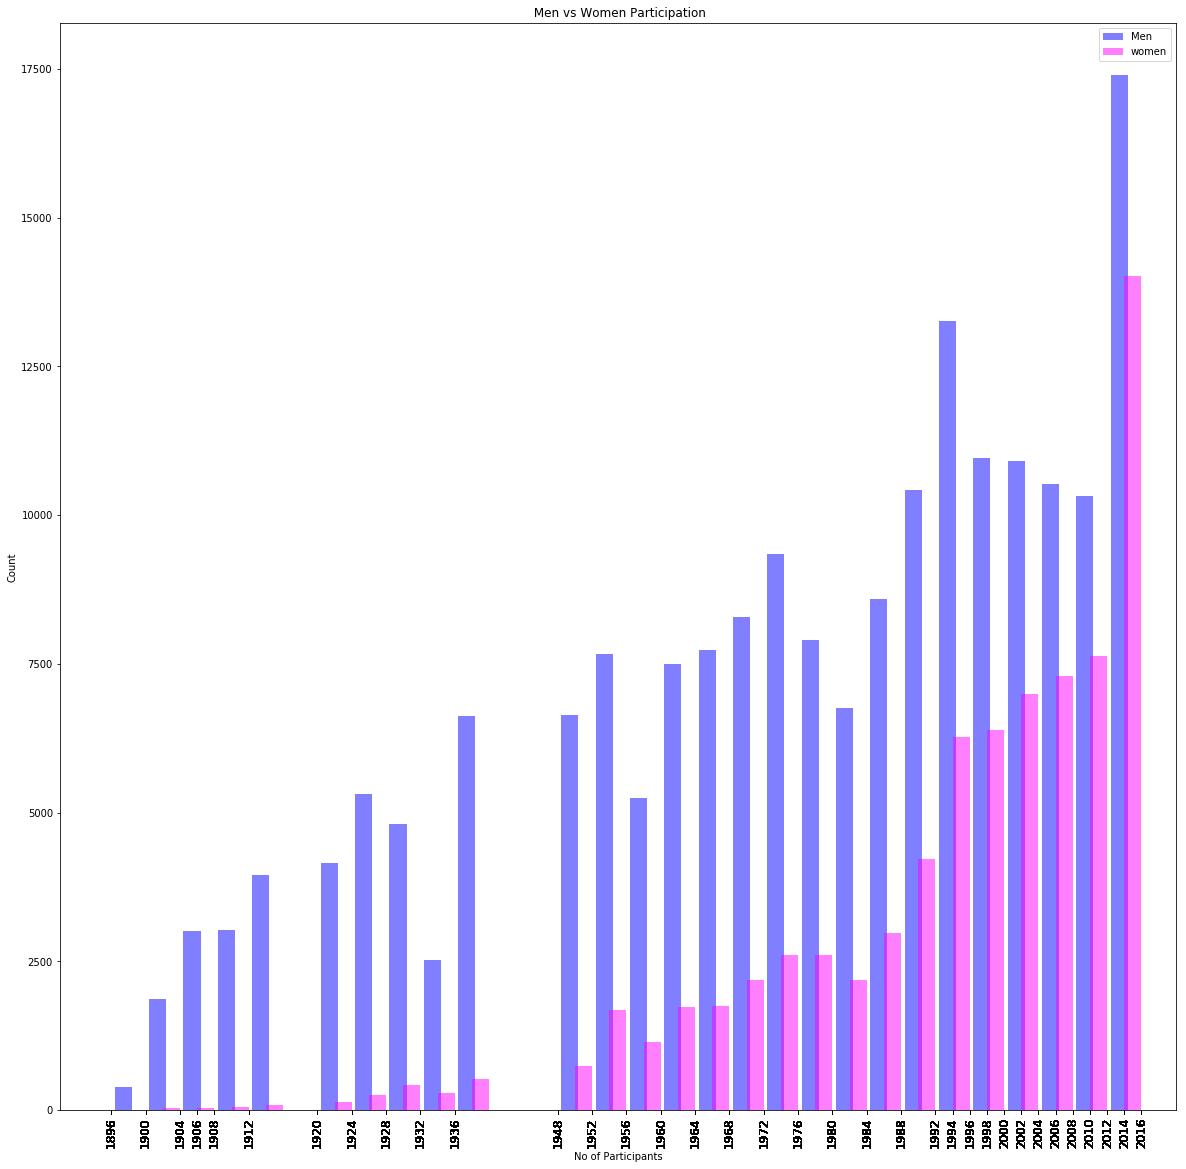

In [324]:
# Plotting histogram with Overall data and Women athlete data

plt.figure(figsize=(20,20))

colors = ["Blue",'Magenta']
legend = ["Men","women"]
Target = [df_m['Year'],df_w['Year']]
plt.hist(Target, bins = 30, width = 2.0, color=colors, alpha = 0.5)
plt.title(" Men vs Women Participation")
plt.xlabel('No of Participants')
plt.ylabel('Count')
plt.xticks(df['Year'], rotation = 90, size =12)
plt.xlim(1890,2020)
#plt.grid(True)
plt.legend(legend)
plt.show()

In [323]:
plt.close()

In [195]:
df.groupby('Sex')["ID"].nunique()

Sex
F     33922
M    101464
Name: ID, dtype: int64

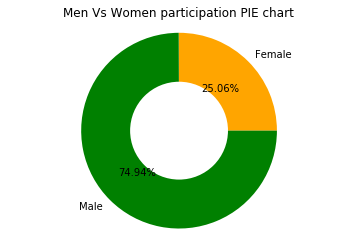

In [197]:
# Men Vs Women PIE chart
#explode = [0,0.1]
labels = ['Female','Male']
colors = ['orange','green']
sizes = df.groupby('Sex')["ID"].nunique()
plt.pie(sizes,labels =labels,autopct='%1.2f%%',startangle=0, colors = colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Men Vs Women participation PIE chart")

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [198]:
plt.close()

In [199]:
# No of Men Vs Women participation in years 1900 to 1920
# Men
df_m1 = df_m[ (df_m['Year'] > 1900) &  (df_m['Year'] < 1920)]
#df_m1 # 9980 rows × 17 columns

# Women
df_w1 = df_w[ (df_w['Year'] > 1900) &  (df_w['Year'] < 1920)]
#df_w1 # 161 rows × 17 columns

In [200]:
df_w.describe()

,ID,Age,Height,Weight,Year
count,74242.000000,73840.000000,67259.000000,66650.000000,74242.000000
mean,69918.483769,23.700853,167.846117,60.026677,1992.539829
std,38920.165432,5.695163,8.780677,10.215639,20.317853
min,5.000000,11.000000,127.000000,25.000000,1900.000000
25%,36518.000000,20.000000,162.000000,54.000000,1984.000000
50%,70097.000000,23.000000,168.000000,59.000000,1998.000000
75%,103493.750000,27.000000,173.000000,65.000000,2008.000000
max,135568.000000,74.000000,213.000000,167.000000,2016.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x191ddbfd0>,
      dtype=object)

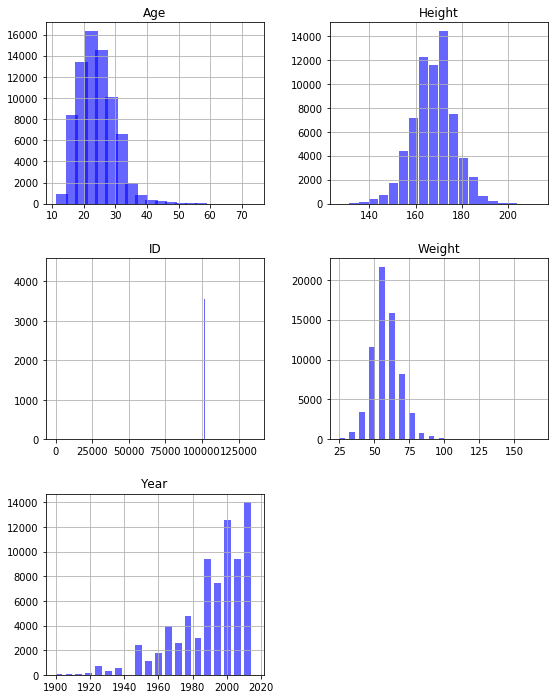

In [201]:
# Histogram to plot above data
fig = plt.figure(figsize = (9,12))
ax = fig.gca() # gca = get current axes
df_w.hist(ax = ax, bins = 20, width = 4.0, facecolor = 'blue', alpha = 0.6 )

In [202]:
plt.close()

In [220]:
# Top 5 countries with highest participations
#df_USA.groupby('Sex')["ID"].nunique()
#Top_N = df.region.value_counts()
#Top_N = df_w.region.value_counts().reset_index(name='Medal').head(10)
N_by_Region = df.groupby("region")['ID'].nunique()
#Top_N = N_by_Region
#print(Top_N.head())
type(N_by_Region)
N_by_Region.sort_values(ascending=False)

region
USA                        9653
Germany                    7575
UK                         6281
France                     6170
Russia                     5610
Italy                      4935
Canada                     4812
Japan                      4067
Australia                  3870
Sweden                     3787
China                      2985
Poland                     2970
Netherlands                2939
Switzerland                2883
Czech Republic             2782
Hungary                    2761
Spain                      2637
South Korea                2393
Finland                    2347
Austria                    2337
Norway                     2216
Belgium                    2078
Brazil                     2053
Denmark                    1923
Argentina                  1848
Romania                    1798
Greece                     1717
Serbia                     1661
Mexico                     1549
Bulgaria                   1502
                           ... 
A

### Top 5 countries with highest participation are

######       USA            -            9653
######      Germany       -          7575
######      UK                  -         6281
######      France        -              6170
######      Russia         -            5610

In [223]:
# #1 USA data charts

df_USA = df[df["region"]=='USA'] 
df_USA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
14550,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
14551,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
14552,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
14553,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14554,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [224]:
# #2 Germany data
df_Germany = df[df["region"]=='Germany'] 
df_Germany.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
122543,133,Franz Abb,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Germany,NaN
122544,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
122545,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN
122546,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Germany,NaN
122547,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN,Germany,NaN


In [225]:
# #3 UK data
df_UK = df[df["region"]=='UK'] 
df_UK.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
202761,453,Leslie Ablett,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN,UK,NaN
202762,453,Leslie Ablett,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN,UK,NaN
202763,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN,UK,NaN
202764,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN,UK,NaN
202765,509,Gary Abraham,M,21.0,175.0,64.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,NaN,UK,NaN


In [226]:
# #4 France
df_France = df[df["region"]=='France'] 
df_France.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
49111,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN,France,NaN
49112,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,NaN,France,NaN
49113,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Individual",NaN,France,NaN
49114,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team",Gold,France,NaN
49115,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,NaN


In [227]:
# #5 Russia
df_Russia = df[df["region"]=='Russia'] 
df_Russia.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
84951,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,NaN
84952,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN,Russia,NaN
84953,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver,Russia,NaN
84954,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's 500 metres Time Trial,NaN,Russia,NaN
84955,356,Adlan Aliyevich Abdurashidov,M,26.0,172.0,60.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,NaN,Russia,NaN


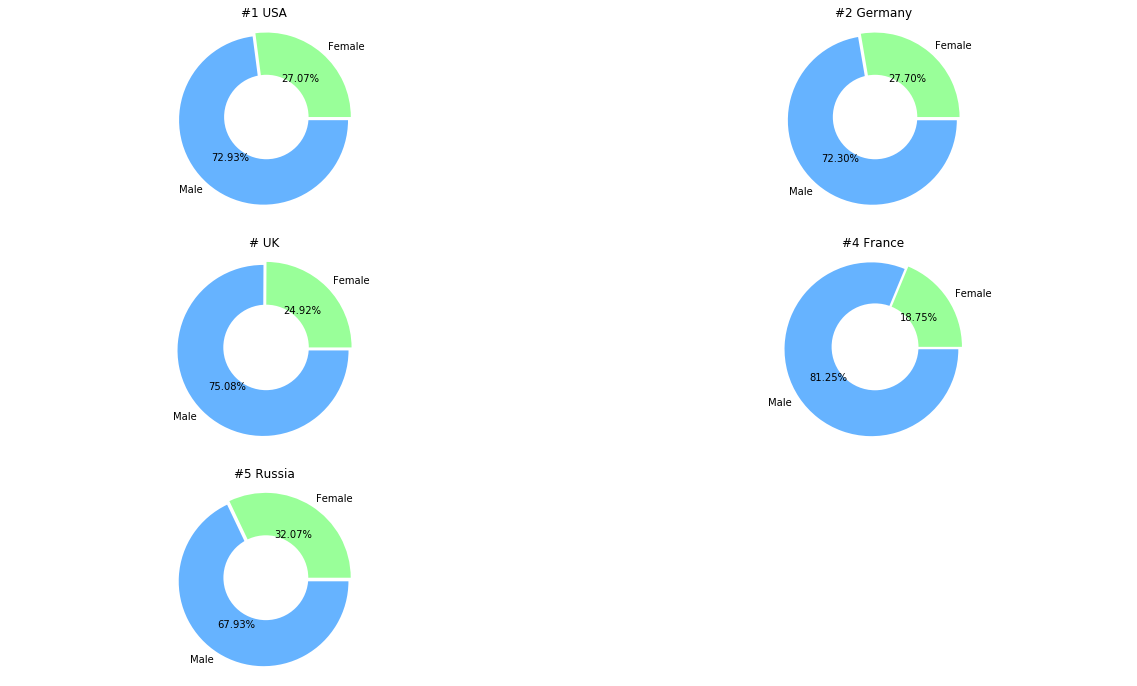

In [229]:
plt.figure(figsize=(20,12))


plt.subplot(321)

labels = ['Female','Male']
colors = ['#99ff99','#66b3ff']
sizes = df_USA.groupby('Sex')["ID"].nunique()
plt.pie(sizes,labels =labels,autopct='%1.2f%%',startangle=0, colors = colors, explode = [0,.05])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("#1 USA")

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(322)

labels = ['Female','Male']
colors = ['#99ff99','#66b3ff']
sizes = df_Germany.groupby('Sex')["ID"].nunique()
plt.pie(sizes,labels =labels,autopct='%1.2f%%',startangle=0, colors = colors, explode = [0,.05])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("#2 Germany")


centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(323)

labels = ['Female','Male']
colors = ['#99ff99','#66b3ff']
sizes = df_UK.groupby('Sex')["ID"].nunique()
plt.pie(sizes,labels =labels,autopct='%1.2f%%',startangle=0, colors = colors, explode = [0,.05])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("# UK")


centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(324)

labels = ['Female','Male']
colors = ['#99ff99','#66b3ff']
sizes = df_France.groupby('Sex')["ID"].nunique()
plt.pie(sizes,labels =labels,autopct='%1.2f%%',startangle=0, colors = colors, explode = [0,.05])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("#4 France")


centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(325)

labels = ['Female','Male']
colors = ['#99ff99','#66b3ff']
sizes = df_Russia.groupby('Sex')["ID"].nunique()
plt.pie(sizes,labels =labels,autopct='%1.2f%%',startangle=0, colors = colors, explode = [0,.05])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("#5 Russia")


centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [230]:
plt.close()

### Lets work on USA - Women Data

In [231]:

# USA Women data
df_w_USA = df_USA[df_USA["Sex"]=='F']
df_w_USA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
14571,149,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",NaN,USA,NaN
14572,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
14573,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
14574,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA,NaN
14575,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA,NaN


In [232]:
#Dropping duplicates
df_w_USA = df_w_USA.drop_duplicates()
df_w_USA.describe()

,ID,Age,Height,Weight,Year
count,5489.000000,5476.000000,5054.000000,5003.000000,5489.000000
mean,68808.577519,24.401753,168.664226,61.532081,1989.001640
std,38904.001316,6.440853,9.433186,11.123292,23.055615
min,149.000000,12.000000,139.000000,34.000000,1900.000000
25%,34316.000000,20.000000,162.000000,55.000000,1976.000000
50%,69244.000000,24.000000,168.000000,61.000000,1996.000000
75%,102534.000000,28.000000,175.000000,68.000000,2008.000000
max,135381.000000,65.000000,203.000000,155.000000,2016.000000


In [233]:
df_w_USA.shape

(5489, 17)

In [234]:
df_w_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 14571 to 33392
Data columns (total 17 columns):
ID        5489 non-null int64
Name      5489 non-null object
Sex       5489 non-null object
Age       5476 non-null float64
Height    5054 non-null float64
Weight    5003 non-null float64
Team      5489 non-null object
NOC       5489 non-null object
Games     5489 non-null object
Year      5489 non-null int64
Season    5489 non-null object
City      5489 non-null object
Sport     5489 non-null object
Event     5489 non-null object
Medal     1805 non-null object
region    5489 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 771.9+ KB


In [235]:
# Filling missing Height and Weight values with mean 

df_w_USA['Height'] = df_w_USA['Height'].fillna((df_w_USA['Height'].mean()))

In [236]:
df_w_USA['Weight'] = df_w_USA['Weight'].fillna((df_w_USA['Weight'].mean()))

In [237]:
df_w_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 14571 to 33392
Data columns (total 17 columns):
ID        5489 non-null int64
Name      5489 non-null object
Sex       5489 non-null object
Age       5476 non-null float64
Height    5489 non-null float64
Weight    5489 non-null float64
Team      5489 non-null object
NOC       5489 non-null object
Games     5489 non-null object
Year      5489 non-null int64
Season    5489 non-null object
City      5489 non-null object
Sport     5489 non-null object
Event     5489 non-null object
Medal     1805 non-null object
region    5489 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 771.9+ KB


In [238]:
df_w_USA.loc[df_w_USA['Age'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
15628,9678,Miami Belle Louis,F,NaN,168.664226,61.532081,United States,USA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Literature,NaN,USA,NaN
18988,30518,"Pamela Camille ""Pam"" Dukes (-Boyer, -Brown)",F,NaN,168.664226,61.532081,United States,USA,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's Shot Put,NaN,USA,NaN
19907,36410,Mabel Fossler,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Music,NaN,USA,NaN
23478,60500,Nana King,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Music,NaN,USA,NaN
24404,69234,Jessica Lewis,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Music,NaN,USA,NaN
24406,69244,Marjorie Lewis,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Music,NaN,USA,NaN
26231,80805,Eleanor A. Modrakowska,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
26715,85195,Grace Nelson,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Music,NaN,USA,NaN
29300,106085,Patricia Saubert-Wetzel,F,NaN,168.664226,61.532081,United States,USA,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
30969,117073,Elise Swanson,F,NaN,168.664226,61.532081,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,Art Competitions Mixed Music,NaN,USA,NaN


In [239]:
# Checking if any of the missing "Age" records have another entry with same ID to fill missing Age
# but none of the records have Age filled
df_w_USA.loc[df_w_USA["ID"] == 118921]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
31144,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,168.664226,61.532081,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
31145,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,168.664226,61.532081,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN
31146,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,168.664226,61.532081,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN


In [240]:
df_w_USA['Age'] = df_w_USA['Age'].fillna((df_w_USA['Age'].mean()))

In [241]:
df_w_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5489 entries, 14571 to 33392
Data columns (total 17 columns):
ID        5489 non-null int64
Name      5489 non-null object
Sex       5489 non-null object
Age       5489 non-null float64
Height    5489 non-null float64
Weight    5489 non-null float64
Team      5489 non-null object
NOC       5489 non-null object
Games     5489 non-null object
Year      5489 non-null int64
Season    5489 non-null object
City      5489 non-null object
Sport     5489 non-null object
Event     5489 non-null object
Medal     1805 non-null object
region    5489 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 771.9+ KB


In [262]:
#Some validations
df_w_USA[df_w_USA["Year"] == 2014].shape

(158, 17)

In [263]:
#No_of_Participants = df_w_USA.groupby(["Year"])["ID"].nunique().reset_index()
No_of_Participants = df_w_USA.groupby(["Year"])["ID"].nunique().to_dict()
No_of_Participants 

{1900: 7,
 1904: 6,
 1920: 14,
 1924: 26,
 1928: 47,
 1932: 80,
 1936: 55,
 1948: 48,
 1952: 51,
 1956: 57,
 1960: 69,
 1964: 98,
 1968: 104,
 1972: 110,
 1976: 148,
 1980: 25,
 1984: 213,
 1988: 226,
 1992: 240,
 1994: 52,
 1996: 273,
 1998: 81,
 2000: 253,
 2002: 87,
 2004: 254,
 2006: 87,
 2008: 282,
 2010: 92,
 2012: 268,
 2014: 100,
 2016: 291}

In [286]:
# Extracting year and no of participants to feed to barh chart for plotting
Year_data = list(No_of_Participants.keys())
Nos = list(No_of_Participants.values())
#group_mean = np.mean(group_data)
#Year_data

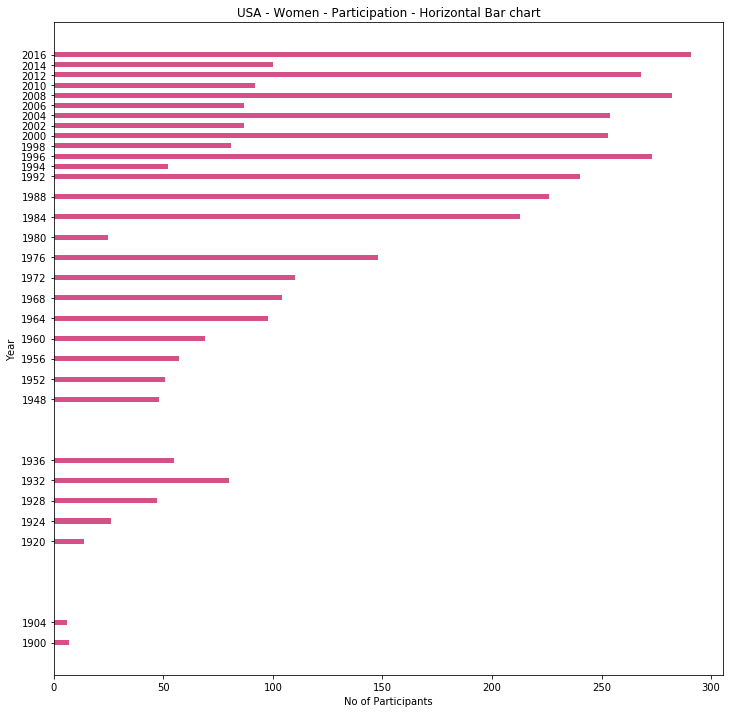

In [287]:
#fig, ax = plt.subplots()
plt.figure(figsize=(12,12))
plt.barh(Year_data,Nos ,height =1.0, color = "#d45087", tick_label = Year_data )
plt.title("USA - Women - Participation - Horizontal Bar chart")
plt.ylabel("Year")
plt.xlabel("No of Participants")
#plt.grid(True)
plt.show()

In [266]:
plt.close()

In [267]:
# Create dictionary with Year as Key and No of Participants as Value
#No_of_Participants = df_w_USA.groupby(["Year"])["ID"].nunique().reset_index()
No_of_Participants = df_w_USA.groupby(["Year"])["ID"].nunique().to_dict()
No_of_Participants 

{1900: 7,
 1904: 6,
 1920: 14,
 1924: 26,
 1928: 47,
 1932: 80,
 1936: 55,
 1948: 48,
 1952: 51,
 1956: 57,
 1960: 69,
 1964: 98,
 1968: 104,
 1972: 110,
 1976: 148,
 1980: 25,
 1984: 213,
 1988: 226,
 1992: 240,
 1994: 52,
 1996: 273,
 1998: 81,
 2000: 253,
 2002: 87,
 2004: 254,
 2006: 87,
 2008: 282,
 2010: 92,
 2012: 268,
 2014: 100,
 2016: 291}

In [268]:
# Medals data
df_w_USA_Gold = df_w_USA[df_w_USA['Medal'] == 'Gold']
df_w_USA_Silver = df_w_USA[df_w_USA['Medal'] == 'Silver']
df_w_USA_Bronze = df_w_USA[df_w_USA['Medal'] == 'Bronze']

In [269]:
# Create dictionary with Year as Key and No of Gold/Silver/Bronze as Values
No_of_Gold_Medals_by_Year = df_w_USA_Gold.groupby(['Year']).count().to_dict()
No_of_Silver_Medals_by_Year = df_w_USA_Silver.groupby(['Year']).count().to_dict()
No_of_Bronze_Medals_by_Year = df_w_USA_Bronze.groupby(['Year']).count().to_dict()

In [270]:
No_of_Gold_Medals_by_Year["Medal"]

{1900: 1,
 1904: 6,
 1920: 7,
 1924: 13,
 1928: 11,
 1932: 17,
 1936: 7,
 1948: 9,
 1952: 9,
 1956: 5,
 1960: 25,
 1964: 23,
 1968: 29,
 1972: 26,
 1976: 10,
 1984: 72,
 1988: 30,
 1992: 37,
 1994: 4,
 1996: 100,
 1998: 23,
 2000: 62,
 2002: 6,
 2004: 65,
 2006: 2,
 2008: 58,
 2010: 2,
 2012: 103,
 2014: 5,
 2016: 85}

In [271]:
#Gold Medals data 
# Extacting Keys and Values to feed them into bar chart for plotting
Year_Gold_data = list(No_of_Gold_Medals_by_Year["Medal"].keys())
Nos_Gold = list(No_of_Gold_Medals_by_Year["Medal"].values())
#Year_Gold_data
#Nos_Gold

In [272]:
#Silver Medals data
# Extacting Keys and Values to feed them into bar chart for plotting
Year_Silver_data = list(No_of_Silver_Medals_by_Year["Medal"].keys())
Nos_Silver = list(No_of_Silver_Medals_by_Year["Medal"].values())

In [273]:
#Bronze Medals data
# Extacting Keys and Values to feed them into bar chart for plotting
Year_Bronze_data = list(No_of_Bronze_Medals_by_Year["Medal"].keys())
Nos_Bronze = list(No_of_Bronze_Medals_by_Year["Medal"].values())

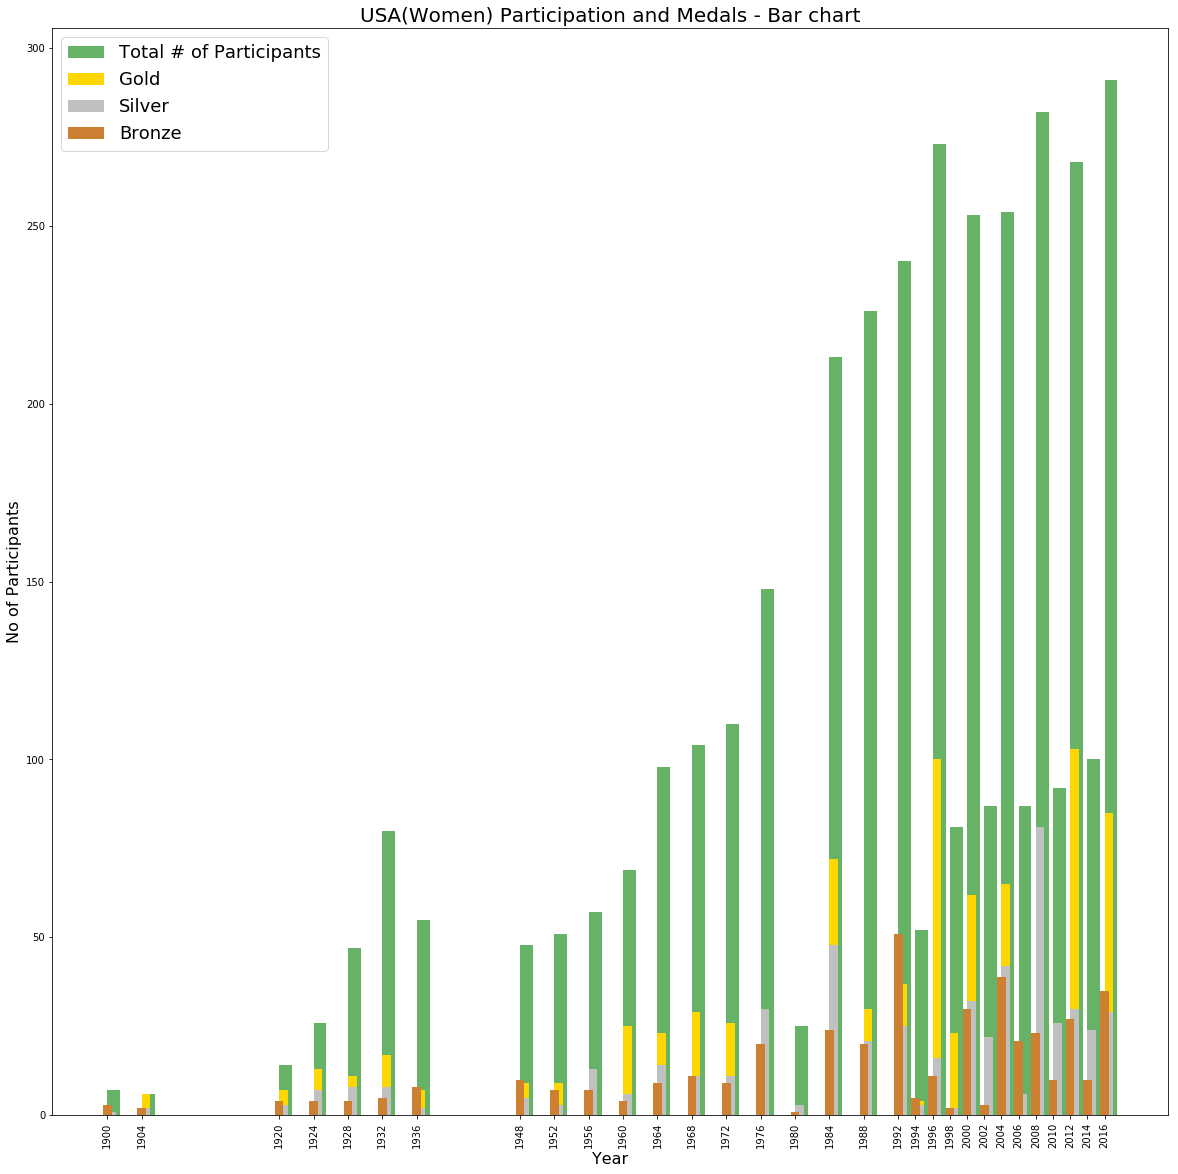

In [276]:
# Plotting USA(Women) Participation and Medals - Bar chart

fig, ax = plt.subplots()
plt.gcf().set_size_inches(20, 20)
legend = ["Total # of Participants","Gold","Silver","Bronze"]
#ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)
rects1 = ax.bar(Year_data,Nos, width = 1.5 ,color = "Green", alpha=0.6, tick_label = Year_data, align='edge')
rects2 = ax.bar(Year_Gold_data,Nos_Gold,width = 1.0 ,color = "#FFD700", align='edge')
rects3 = ax.bar(Year_Silver_data,Nos_Silver,width = 1.0 ,color = "#C0C0C0", align='edge')
rects4 = ax.bar(Year_Bronze_data,Nos_Bronze,width = 1.0 ,color = "#CD7F32", align='center')

plt.title("USA(Women) Participation and Medals - Bar chart", size = 20)
plt.xlabel("Year", size = 16)
plt.ylabel("No of Participants", size = 16)
plt.xticks(Year_data, rotation = 90, size=10)
plt.legend(legend,fontsize=18)
plt.show()

In [275]:
plt.close()

### Lets plot horizontal bar chart Sport wise 

In [282]:
#df_w_USA[df_w_USA["Sport"]== 'Wrestling']

In [299]:
No_of_Participants_by_Sport = df_w_USA.groupby(["Sport"])["ID"].count().to_dict()
No_of_Participants_by_Sport

{'Alpine Skiing': 273,
 'Archery': 63,
 'Art Competitions': 53,
 'Athletics': 854,
 'Badminton': 16,
 'Basketball': 119,
 'Beach Volleyball': 26,
 'Biathlon': 90,
 'Bobsleigh': 20,
 'Boxing': 5,
 'Canoeing': 71,
 'Cross Country Skiing': 210,
 'Curling': 23,
 'Cycling': 85,
 'Diving': 126,
 'Equestrianism': 154,
 'Fencing': 152,
 'Figure Skating': 148,
 'Football': 96,
 'Freestyle Skiing': 48,
 'Golf': 8,
 'Gymnastics': 572,
 'Handball': 56,
 'Hockey': 96,
 'Ice Hockey': 101,
 'Judo': 33,
 'Luge': 40,
 'Modern Pentathlon': 10,
 'Rhythmic Gymnastics': 21,
 'Rowing': 211,
 'Rugby Sevens': 12,
 'Sailing': 45,
 'Shooting': 91,
 'Short Track Speed Skating': 67,
 'Skeleton': 7,
 'Ski Jumping': 3,
 'Snowboarding': 40,
 'Softball': 60,
 'Speed Skating': 226,
 'Swimming': 730,
 'Synchronized Swimming': 62,
 'Table Tennis': 43,
 'Taekwondo': 9,
 'Tennis': 68,
 'Trampolining': 5,
 'Triathlon': 15,
 'Volleyball': 132,
 'Water Polo': 63,
 'Weightlifting': 15,
 'Wrestling': 16}

In [300]:
# Extracting Sports and Nos of Participants by Sport to give it to barh chart for plotting
Sport_data = list(No_of_Participants_by_Sport.keys())
Nos_by_Sport = list(No_of_Participants_by_Sport.values())

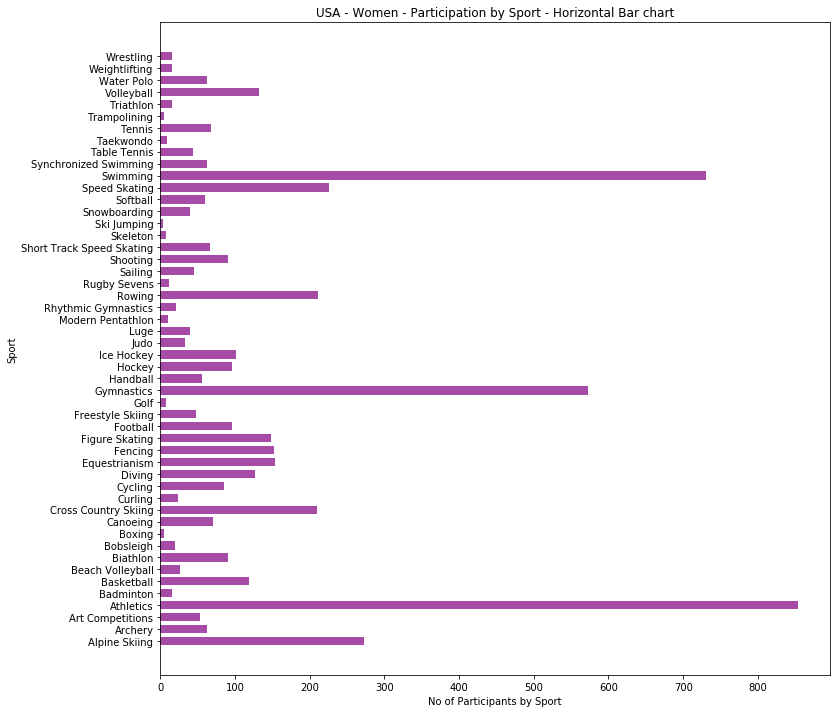

In [302]:
#fig, ax = plt.subplots()
plt.figure(figsize=(12,12))
plt.barh(Sport_data,Nos_by_Sport , height = 0.7, color = "purple",alpha=0.7, tick_label = Sport_data )
plt.title("USA - Women - Participation by Sport - Horizontal Bar chart")
plt.ylabel("Sport")
plt.xlabel("No of Participants by Sport")
#plt.grid(True)
plt.show()

In [327]:
plt.close()

## Athletes who won highest no of gold medals

In [304]:
df_w_USA_Gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
14572,150,Margaret Ives Abbott (-Dunne),F,23.0,168.664226,61.532081,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
14667,1380,"Christine M. ""Crissy"" Ahmann-Leighton (-Perham)",F,22.0,172.000000,52.000000,United States,USA,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
14669,1380,"Christine M. ""Crissy"" Ahmann-Leighton (-Perham)",F,22.0,172.000000,52.000000,United States,USA,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold,USA,NaN
14678,1622,Michelle Anne Akers,F,30.0,178.000000,68.000000,United States,USA,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Gold,USA,NaN
14679,1682,Morolake Akinosun,F,22.0,163.000000,61.000000,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold,USA,NaN
14695,2386,"Tenley Emma Albright (-Gardiner, -Blakely)",F,20.0,168.664226,61.532081,United States,USA,1956 Winter,1956,Winter,Cortina d'Ampezzo,Figure Skating,Figure Skating Women's Singles,Gold,USA,NaN
14765,2929,Lynne Marie Allsup (-Olson),F,15.0,163.000000,59.000000,United States,USA,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
14782,3363,Christie Ambrosi,F,23.0,172.000000,70.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,Gold,USA,NaN
14801,3792,Alyssa Jean Anderson,F,21.0,173.000000,64.000000,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,Gold,USA,NaN
14802,3793,Andrea Arlene Anderson (-Bolder),F,22.0,164.000000,61.000000,United States,USA,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Gold,USA,NaN


In [311]:
#Extracting Athletes and No of medals won to dictionary
No_of_medals_won_by_athlete = df_w_USA.groupby("Name")["Medal"].count().to_dict()
type(No_of_medals_won_by_athlete)

dict

In [326]:
# Sorting dictionary by values

No_of_medals_won_by_athlete_Sorted =sorted(No_of_medals_won_by_athlete.items(), key = lambda x : x[1],reverse=True)[:5]
print(" Top 5 Athletes with maximum medals")
print(No_of_medals_won_by_athlete_Sorted)

 Top 5 Athletes with maximum medals
[('Dara Grace Torres (-Hoffman, -Minas)', 12), ('Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)', 12), ('Natalie Anne Coughlin (-Hall)', 12), ('Allyson Michelle Felix', 9), ('Shirley Frances Babashoff', 9)]


In [320]:
#Validating Top #1 ATHLETE
df_w_USA.loc[df_w_USA["Name"]=="Dara Grace Torres (-Hoffman, -Minas)"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
31513,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,17.0,183.0,68.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
31514,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,21.0,183.0,68.0,United States,USA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 100 metres Freestyle,NaN,USA,NaN
31515,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,21.0,183.0,68.0,United States,USA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,USA,NaN
31516,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,21.0,183.0,68.0,United States,USA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Silver,USA,NaN
31517,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,25.0,183.0,68.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
31518,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 50 metres Freestyle,Bronze,USA,NaN
31519,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 100 metres Freestyle,Bronze,USA,NaN
31520,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
31521,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 100 metres Butterfly,Bronze,USA,NaN
31522,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold,USA,NaN


In [396]:
plt.close()

### Medals by country

In [383]:
#Medal_winners_by_Country = df_w.groupby(["region"])["Medal"].count().to_dict()
Medal_winners_by_Country_all = df_w.groupby(["region"])["Medal"].count()
Medal_winners_by_Country = Medal_winners_by_Country_all.where(Medal_winners_by_Country_all > 0)
# dropping countries with no medals
Medals_by_Country = Medal_winners_by_Country.dropna()
Total_Medals_by_Country= Medals_by_Country.to_dict()
Total_Medals_by_Country

{'Algeria': 3.0,
 'Argentina': 73.0,
 'Armenia': 1.0,
 'Australia': 549.0,
 'Austria': 97.0,
 'Azerbaijan': 10.0,
 'Bahamas': 14.0,
 'Bahrain': 3.0,
 'Belarus': 77.0,
 'Belgium': 23.0,
 'Brazil': 135.0,
 'Bulgaria': 128.0,
 'Burundi': 1.0,
 'Cameroon': 2.0,
 'Canada': 520.0,
 'Chile': 1.0,
 'China': 656.0,
 'Colombia': 13.0,
 'Costa Rica': 4.0,
 'Croatia': 15.0,
 'Cuba': 93.0,
 'Czech Republic': 131.0,
 'Denmark': 107.0,
 'Egypt': 2.0,
 'Estonia': 4.0,
 'Ethiopia': 23.0,
 'Finland': 119.0,
 'France': 228.0,
 'Georgia': 1.0,
 'Germany': 1246.0,
 'Greece': 47.0,
 'Hungary': 267.0,
 'Iceland': 1.0,
 'India': 5.0,
 'Individual Olympic Athletes': 2.0,
 'Indonesia': 15.0,
 'Iran': 1.0,
 'Ireland': 8.0,
 'Israel': 2.0,
 'Italy': 219.0,
 'Ivory Coast': 1.0,
 'Jamaica': 86.0,
 'Japan': 301.0,
 'Kazakhstan': 21.0,
 'Kenya': 21.0,
 'Kosovo': 1.0,
 'Latvia': 2.0,
 'Liechtenstein': 5.0,
 'Lithuania': 10.0,
 'Malaysia': 4.0,
 'Mexico': 17.0,
 'Moldova': 1.0,
 'Mongolia': 4.0,
 'Montenegro': 14.0,
 '

In [340]:
# Sorting dictionary by values

Medal_winners_by_Country_Sorted =sorted(Medal_winners_by_Country.items(), key = lambda x : x[1],reverse=True)[:5]
print(" Top 5 countries with maximum medals")
print(Medal_winners_by_Country_Sorted)

 Top 5 countries with maximum medals
[('USA', 1805), ('Russia', 1357), ('Germany', 1246), ('China', 656), ('Australia', 549)]


In [384]:
# Extracting Country and Nos of Medals to give it to barh chart for plotting
Country_data = list(Total_Medals_by_Country.keys())
No_of_Medals = list(Total_Medals_by_Country.values())
#Country_data[0:10]

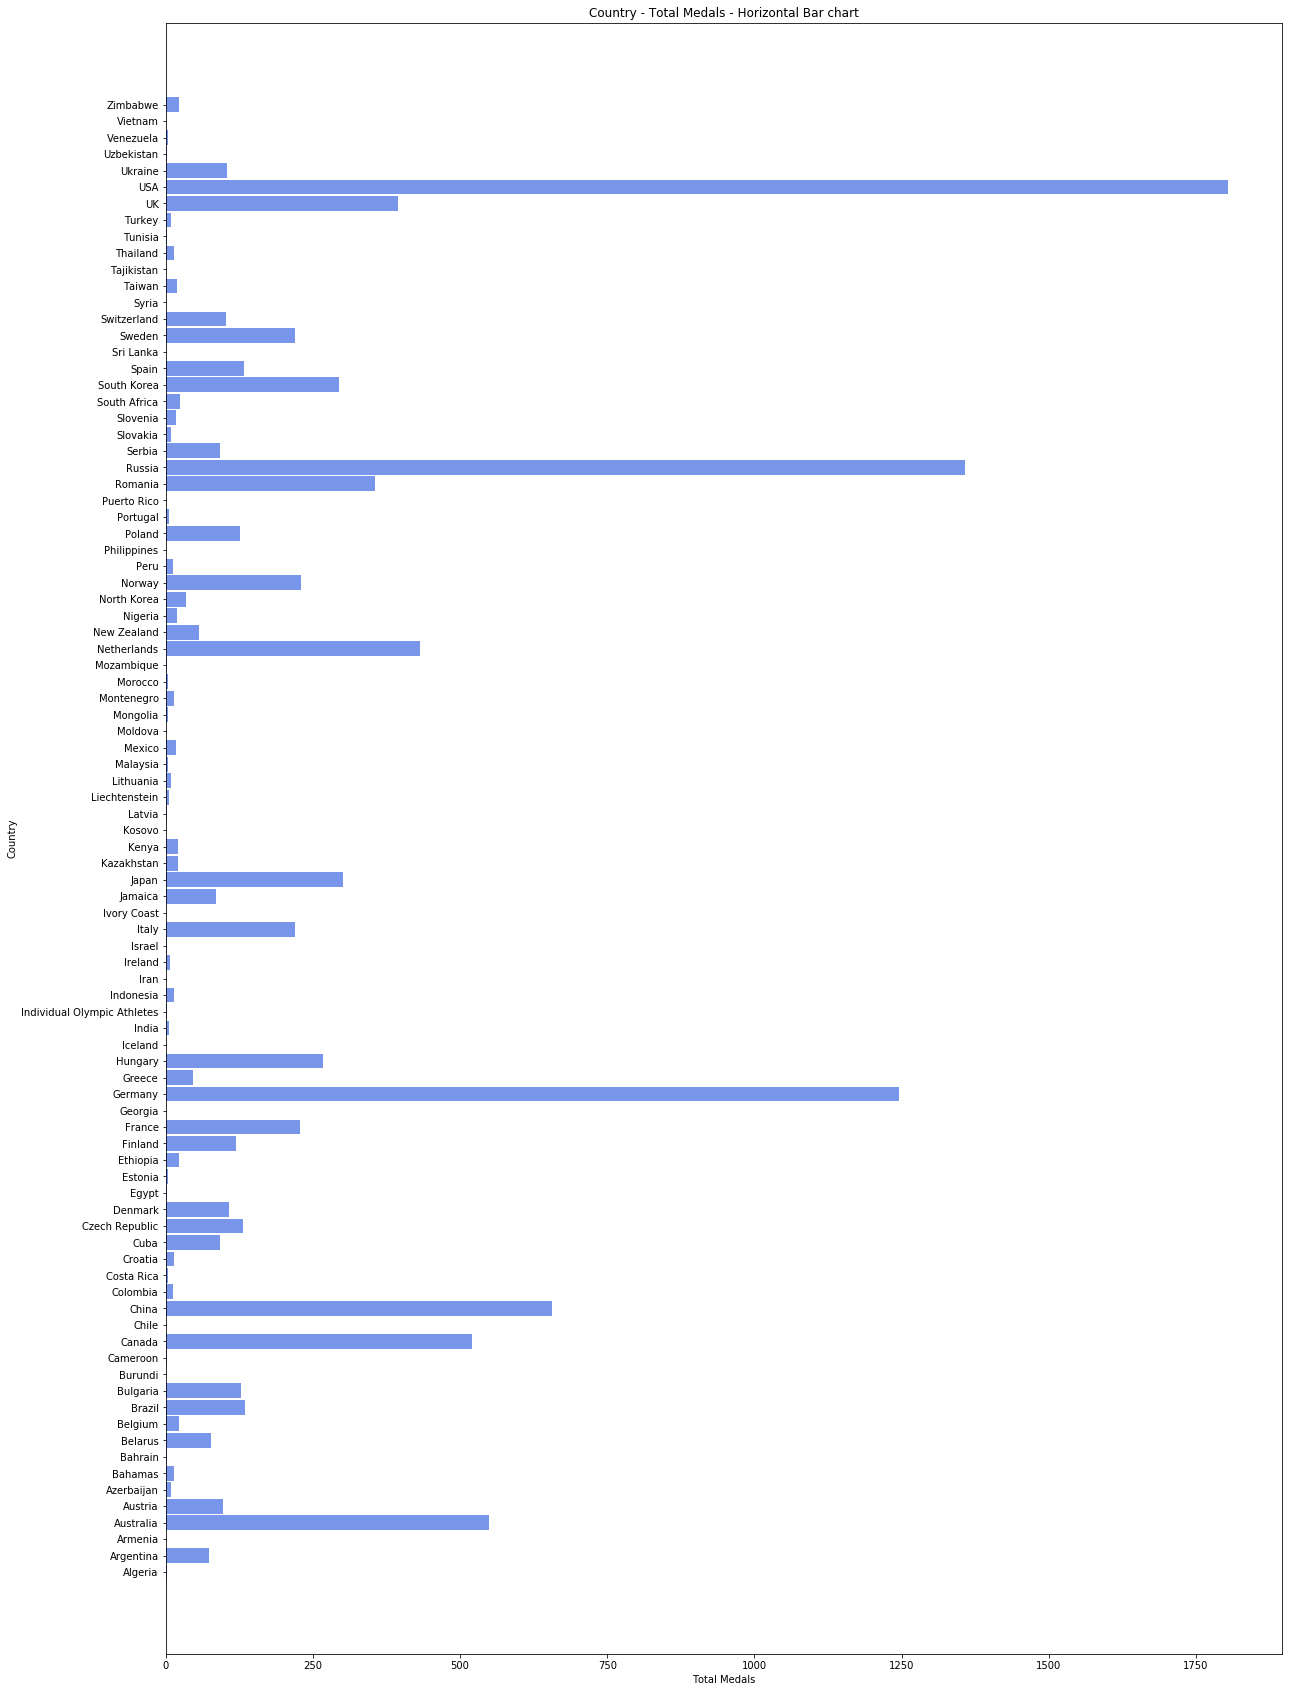

In [387]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20,30))
plt.barh(Country_data,No_of_Medals, height = 0.9, color = "royalblue",alpha=0.7, tick_label = Country_data )
plt.title("Country - Total Medals - Horizontal Bar chart")
plt.ylabel("Country")
plt.xlabel("Total Medals")
#plt.grid(True)
plt.show()

### Box Plot for Age, Height and Weight

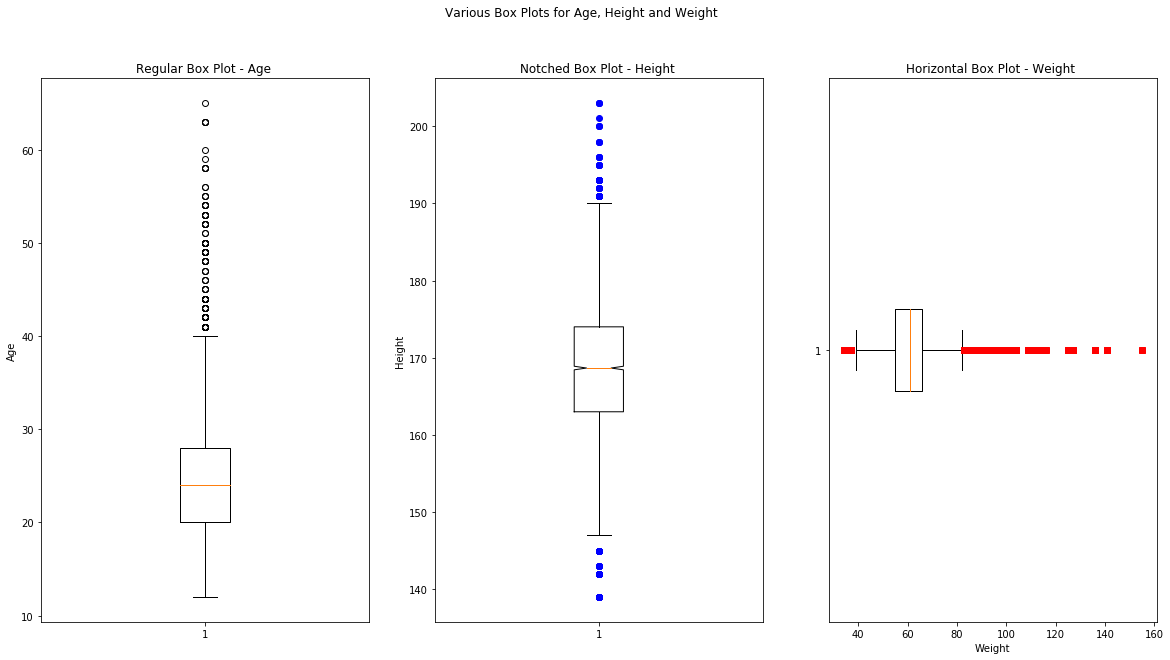

In [392]:
plt.figure(1, figsize=(20, 10))

plt.suptitle('Various Box Plots for Age, Height and Weight')
plt.subplot(131)

plt.boxplot(df_w_USA['Age'])
plt.title("Regular Box Plot - Age ")
plt.ylabel("Age")

plt.subplot(132)
plt.boxplot(df_w_USA['Height'],"1","b")
plt.title("Notched Box Plot - Height ")
plt.ylabel("Height")

plt.subplot(133)
plt.boxplot(df_w_USA['Weight'],0,"rs",0)
plt.title("Horizontal Box Plot - Weight ")
plt.xlabel("Weight")

plt.show()

### 3D plot with variables Age, Height and Weight

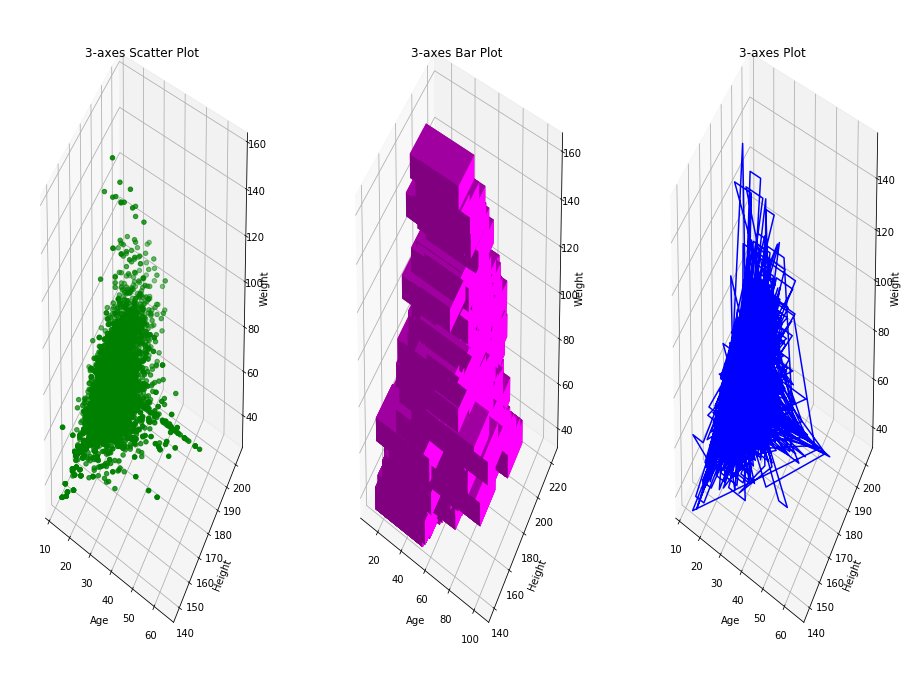

In [395]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(16,12))

ax = fig.add_subplot(131, projection='3d') # row 1 , col 1, plot 1 (position of the plot)

ax.scatter(df_w_USA['Age'],df_w_USA['Height'],df_w_USA['Weight'],color='green')

ax.set_title('3-axes Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')


#fig1 = plt.figure(2,figsize=(6,6))
ax = fig.add_subplot(132, projection='3d') # row 1 , col 2, plot 1 (position of the plot)

ax.bar3d(df_w_USA['Age'],df_w_USA['Height'],df_w_USA['Weight'],40,20,10,color='magenta',shade=True)

ax.set_title('3-axes Bar Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')


ax = fig.add_subplot(133, projection='3d') # row 1 , col 2, plot 1 (position of the plot)

ax.plot(df_w_USA['Age'],df_w_USA['Height'],df_w_USA['Weight'],40,20,10,color='blue')

ax.set_title('3-axes Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

plt.show()

# Deriving mean, median, and mode for Age, Height and Weight of the medalists

## Age

In [420]:
#Medal winners by Age
Medal_by_Age_all = df_w.groupby(["Age"])["Medal"].count()
#Considering Age with 🎖🏅 🥇  > 0
Medal_winners_by_Age = Medal_by_Age_all.where(Medal_by_Age_all>0)
# dropping ages with with no medals
Medal_winners_by_Age = Medal_winners_by_Age.dropna()
Age_Medal = Medal_winners_by_Age.to_dict()
Age_Medal

{11.0: 1.0,
 12.0: 4.0,
 13.0: 13.0,
 14.0: 60.0,
 15.0: 176.0,
 16.0: 290.0,
 17.0: 343.0,
 18.0: 457.0,
 19.0: 523.0,
 20.0: 609.0,
 21.0: 786.0,
 22.0: 878.0,
 23.0: 883.0,
 24.0: 897.0,
 25.0: 910.0,
 26.0: 777.0,
 27.0: 779.0,
 28.0: 602.0,
 29.0: 510.0,
 30.0: 430.0,
 31.0: 315.0,
 32.0: 256.0,
 33.0: 186.0,
 34.0: 146.0,
 35.0: 96.0,
 36.0: 76.0,
 37.0: 43.0,
 38.0: 39.0,
 39.0: 28.0,
 40.0: 20.0,
 41.0: 18.0,
 42.0: 15.0,
 43.0: 13.0,
 44.0: 12.0,
 45.0: 5.0,
 46.0: 10.0,
 47.0: 5.0,
 48.0: 1.0,
 49.0: 2.0,
 50.0: 1.0,
 51.0: 2.0,
 52.0: 3.0,
 53.0: 1.0,
 55.0: 2.0,
 58.0: 2.0,
 63.0: 3.0,
 69.0: 1.0}

In [422]:
# Extracting Age and Nos of Medals to use it for plotting
Age_data = list(Age_Medal.keys())
No_of_Medals_by_Age= list(Age_Medal.values())

In [426]:
import statistics as stats

print("Mean:",stats.mean(Age_data))
print("Median:",stats.median(Age_data))
print("Standard Deviation:",stats.stdev(Age_data))

Mean: 34.48936170212766
Median: 34.0
Standard Deviation: 14.644886836479277


## Height

In [449]:
#Medal winners by Height
Medal_by_Height_all = df_w.groupby(["Height"])["Medal"].count()
#Considering Height with 🎖🏅 🥇  > 0
Medal_winners_by_Height = Medal_by_Height_all.where(Medal_by_Height_all>0)
# dropping Height with with no medals
Medal_winners_by_Height = Medal_winners_by_Height.dropna()
Height_Medal = Medal_winners_by_Height.to_dict()
Height_Medal

{136.0: 5.0,
 137.0: 2.0,
 138.0: 1.0,
 139.0: 4.0,
 140.0: 6.0,
 141.0: 3.0,
 142.0: 12.0,
 143.0: 9.0,
 144.0: 6.0,
 145.0: 28.0,
 146.0: 17.0,
 147.0: 20.0,
 148.0: 21.0,
 149.0: 13.0,
 150.0: 63.0,
 151.0: 11.0,
 152.0: 71.0,
 153.0: 47.0,
 154.0: 46.0,
 155.0: 84.0,
 156.0: 73.0,
 157.0: 146.0,
 158.0: 163.0,
 159.0: 113.0,
 160.0: 359.0,
 161.0: 123.0,
 162.0: 350.0,
 163.0: 325.0,
 164.0: 322.0,
 165.0: 580.0,
 166.0: 276.0,
 167.0: 409.0,
 168.0: 644.0,
 169.0: 300.0,
 170.0: 806.0,
 171.0: 272.0,
 172.0: 525.0,
 173.0: 548.0,
 174.0: 357.0,
 175.0: 552.0,
 176.0: 318.0,
 177.0: 219.0,
 178.0: 414.0,
 179.0: 139.0,
 180.0: 413.0,
 181.0: 138.0,
 182.0: 186.0,
 183.0: 219.0,
 184.0: 87.0,
 185.0: 156.0,
 186.0: 89.0,
 187.0: 48.0,
 188.0: 94.0,
 189.0: 10.0,
 190.0: 64.0,
 191.0: 34.0,
 192.0: 20.0,
 193.0: 40.0,
 194.0: 2.0,
 195.0: 22.0,
 196.0: 17.0,
 197.0: 2.0,
 198.0: 5.0,
 200.0: 4.0,
 201.0: 3.0,
 202.0: 6.0,
 203.0: 4.0,
 204.0: 3.0,
 205.0: 1.0,
 210.0: 2.0}

In [450]:
# Extracting Height and Nos of Medals to use it for plotting
Height_data = list(Height_Medal.keys())
No_of_Medals_by_Height= list(Height_Medal.values())

In [451]:

print("Mean:",stats.mean(Height_data))
print("Median:",stats.median(Height_data))
print("Standard Deviation:",stats.stdev(Height_data))

Mean: 170.65714285714284
Median: 170.5
Standard Deviation: 20.615096279595136


## Weight

In [452]:
#Medal winners by Weight
Medal_by_Weight_all = df_w.groupby(["Weight"])["Medal"].count()
#Considering Weight with 🎖🏅 🥇  > 0
Medal_winners_by_Weight = Medal_by_Weight_all.where(Medal_by_Weight_all>0)
# dropping Weight with with no medals
Medal_winners_by_Weight = Medal_winners_by_Weight.dropna()
Weight_Medal = Medal_winners_by_Weight.to_dict()
Weight_Medal

{28.0: 2.0,
 30.0: 5.0,
 31.0: 1.0,
 32.0: 3.0,
 33.0: 9.0,
 34.0: 5.0,
 35.0: 9.0,
 36.0: 9.0,
 37.0: 15.0,
 38.0: 14.0,
 39.0: 22.0,
 40.0: 45.0,
 41.0: 24.0,
 42.0: 47.0,
 43.0: 52.0,
 44.0: 47.0,
 45.0: 81.0,
 46.0: 50.0,
 47.0: 99.0,
 48.0: 180.0,
 49.0: 91.0,
 50.0: 179.0,
 51.0: 109.0,
 52.0: 259.0,
 52.5: 2.0,
 53.0: 175.0,
 54.0: 257.0,
 54.5: 4.0,
 55.0: 373.0,
 55.5: 7.0,
 56.0: 334.0,
 56.5: 2.0,
 57.0: 418.0,
 58.0: 466.0,
 59.0: 393.0,
 59.5: 4.0,
 60.0: 542.0,
 60.5: 1.0,
 61.0: 343.0,
 61.5: 2.0,
 62.0: 389.0,
 63.0: 518.0,
 64.0: 442.0,
 64.5: 1.0,
 65.0: 433.0,
 66.0: 355.0,
 67.0: 298.0,
 67.5: 2.0,
 68.0: 397.0,
 68.5: 7.0,
 69.0: 232.0,
 69.5: 1.0,
 70.0: 445.0,
 71.0: 157.0,
 72.0: 282.0,
 73.0: 229.0,
 73.5: 1.0,
 74.0: 160.0,
 75.0: 264.0,
 75.5: 1.0,
 76.0: 127.0,
 77.0: 147.0,
 78.0: 137.0,
 79.0: 66.0,
 80.0: 127.0,
 81.0: 56.0,
 82.0: 57.0,
 83.0: 33.0,
 84.0: 26.0,
 85.0: 62.0,
 86.0: 26.0,
 87.0: 5.0,
 88.0: 17.0,
 89.0: 12.0,
 90.0: 25.0,
 91.0: 7.0,
 92.

In [453]:
# Extracting Weight and Nos of Medals to use it for plotting
Weight_data = list(Weight_Medal.keys())
No_of_Medals_by_Weight= list(Weight_Medal.values())

#### Mean, Median, Standard deviation (Age)

In [454]:

print("Mean:",stats.mean(Weight_data))
print("Median:",stats.median(Weight_data))
print("Standard Deviation:",stats.stdev(Weight_data))

Mean: 77.54954954954955
Median: 73.0
Standard Deviation: 30.287107589845654


### Mean of Age, Height and Weight of medalists

In [455]:
#Mean
m_Age = stats.mean(Age_data)
m_Height = stats.mean(Height_data)
m_Weight = stats.mean(Weight_data)

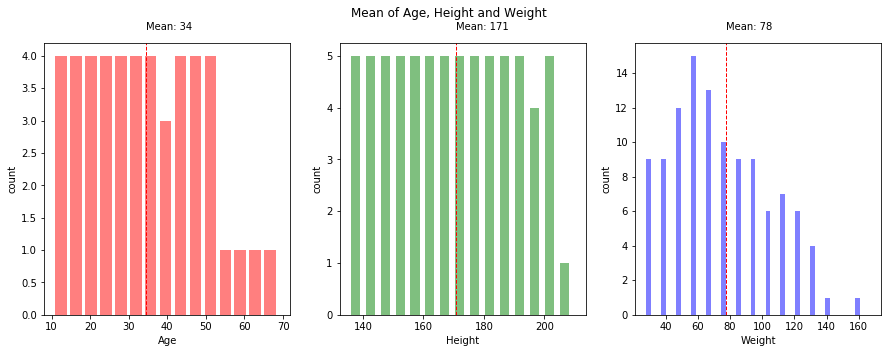

In [499]:

plt.figure(1, figsize=(15, 5))

plt.suptitle('Mean of Age, Height and Weight')
plt.subplot(131)

plt.hist(Age_data,bins= 15,width=3.0, color = "red", alpha = 0.5) # takes a list
plt.xlabel("Age")
plt.ylabel("count")
plt.axvline(m_Age, color='r',linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Age*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Age))



plt.subplot(132)

plt.hist(Height_data,bins= 15,width=3.0 ,color = "green", alpha = 0.5) # takes a list
plt.xlabel("Height")
plt.ylabel("count")
plt.axvline(m_Height, color='r',linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Height*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Height))



plt.subplot(133)

plt.hist(Weight_data,bins= 15,width=3.0, color = "blue", alpha = 0.5 ) # takes a list
plt.xlabel("Weight")
plt.ylabel("count")
plt.axvline(m_Weight, color='r',linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Weight*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Weight))


plt.show()

In [500]:
plt.close()

## 1 Standard Deviation

In [478]:
SD_Age = stats.stdev(Age_data)
SD_Height = stats.stdev(Height_data)
SD_Weight = stats.stdev(Weight_data)

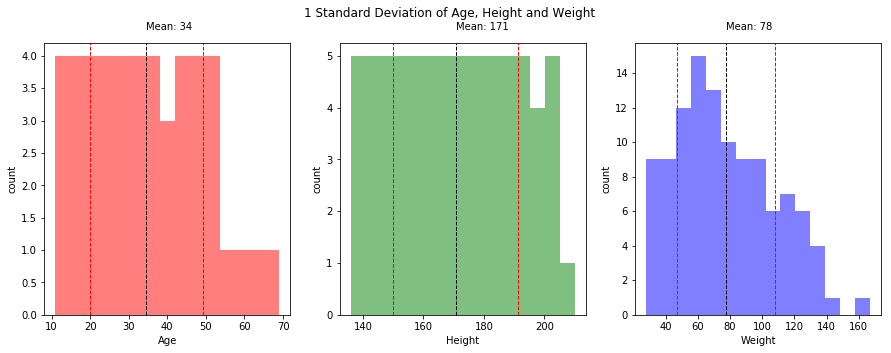

In [488]:

plt.figure(1, figsize=(15, 5))

plt.suptitle('1 Standard Deviation of Age, Height and Weight')

plt.subplot(131)
plt.hist(Age_data,bins=15, color = "red", alpha = 0.5) # takes a list
plt.xlabel("Age")
plt.ylabel("count")
plt.axvline(m_Age+SD_Age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Age-SD_Age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Age, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Age*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Age))


plt.subplot(132)
plt.hist(Height_data,bins=15,color='green', alpha = 0.5) # takes a list
plt.xlabel("Height")
plt.ylabel("count") 
plt.axvline(m_Height+SD_Height, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Height-SD_Height, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Height, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Height*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Height))


plt.subplot(133)
plt.hist(Weight_data,bins=15,color='blue', alpha = 0.5) # takes a list
plt.xlabel("Weight")
plt.ylabel("count")
plt.axvline(m_Weight+SD_Weight, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight-SD_Weight, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Weight*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Weight))


plt.show()

In [492]:
plt.close()

## 2 Standard Deviation

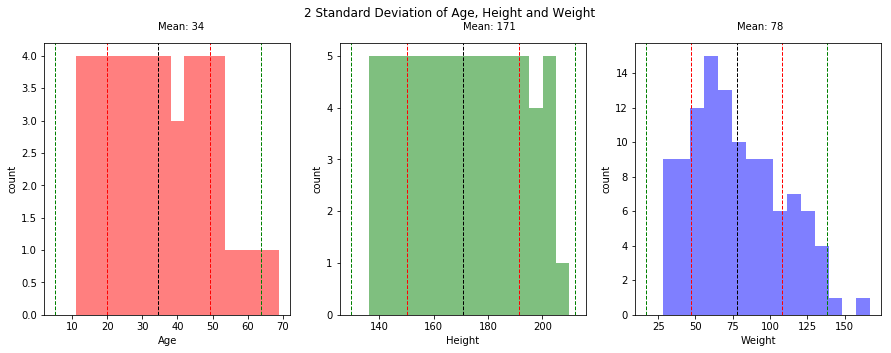

In [491]:

plt.figure(1, figsize=(15, 5))

plt.suptitle('2 Standard Deviation of Age, Height and Weight')

plt.subplot(131)

plt.hist(Age_data,bins=15,color='red', alpha = 0.5) # takes a list
plt.xlabel("Age")
plt.ylabel("count")
plt.axvline(m_Age+SD_Age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Age-SD_Age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Age+SD_Age*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Age-SD_Age*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Age, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Age*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Age))



plt.subplot(132)

plt.hist(Height_data,bins=15,color='green', alpha = 0.5) # takes a list
plt.xlabel("Height")
plt.ylabel("count")
plt.axvline(m_Height+SD_Height, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Height-SD_Height, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Height+SD_Height*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Height-SD_Height*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Height, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Height*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Height))


plt.subplot(133)

plt.hist(Weight_data,bins=15,color='blue', alpha = 0.5) # takes a list
plt.xlabel("Weight")
plt.ylabel("count")
plt.axvline(m_Weight+SD_Weight, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight-SD_Weight, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight+SD_Weight*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight-SD_Weight*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Weight*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Weight))


plt.show()

In [501]:
plt.close()

## 3 Standard Deviation

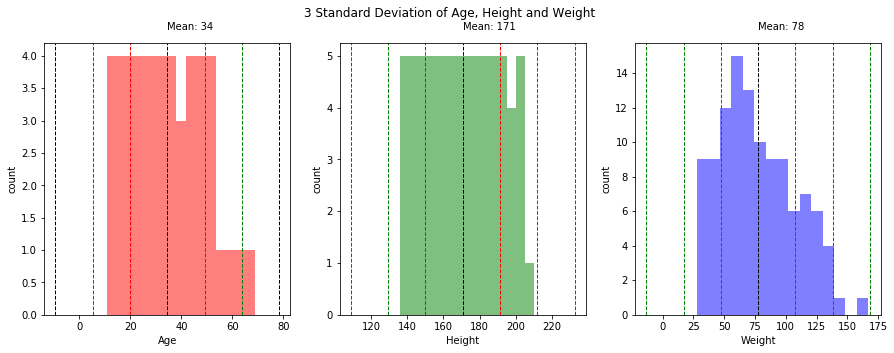

In [498]:

plt.figure(1, figsize=(15, 5))

plt.suptitle('3 Standard Deviation of Age, Height and Weight')

plt.subplot(131)


plt.hist(Age_data,bins=15,color='red', alpha = 0.5)# takes a list
plt.xlabel("Age")
plt.ylabel("count")
plt.axvline(m_Age+SD_Age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Age-SD_Age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Age+SD_Age*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Age-SD_Age*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Age+SD_Age*3, color='black', linestyle='dashed', linewidth=1)
plt.axvline(m_Age-SD_Age*3, color='black', linestyle='dashed', linewidth=1)
plt.axvline(m_Age, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Age*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Age))


plt.subplot(132)

plt.hist(Height_data,bins=15,color='green', alpha = 0.5) # takes a list
plt.xlabel("Height")
plt.ylabel("count")
plt.axvline(m_Height+SD_Height, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Height-SD_Height, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Height+SD_Height*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Height-SD_Height*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Height+SD_Height*3, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Height-SD_Height*3, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Height, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Height*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Height))


plt.subplot(133)

plt.hist(Weight_data,bins=15,color='blue', alpha = 0.5) # takes a list
plt.xlabel("Weight")
plt.ylabel("count")
plt.axvline(m_Weight+SD_Weight, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight-SD_Weight, color='red', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight+SD_Weight*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight-SD_Weight*2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight+SD_Weight*3, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight-SD_Weight*3, color='green', linestyle='dashed', linewidth=1)
plt.axvline(m_Weight, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(m_Weight*1.0, max_ylim*1.05, 'Mean: {:.0f}'.format(m_Weight))



plt.show()

In [677]:
plt.close()

In [678]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74242 entries, 4 to 270743
Data columns (total 18 columns):
ID        74242 non-null int64
Name      74242 non-null object
Sex       74242 non-null object
Age       73840 non-null float64
Height    67259 non-null float64
Weight    66650 non-null float64
Team      74242 non-null object
NOC       74242 non-null object
Games     74242 non-null object
Year      74242 non-null int64
Season    74242 non-null object
City      74242 non-null object
Sport     74242 non-null object
Event     74242 non-null object
Medal     11246 non-null object
region    74242 non-null object
notes     894 non-null object
Total     74242 non-null int64
dtypes: float64(3), int64(3), object(12)
memory usage: 10.8+ MB


In [679]:
#columns_req = df_w['ID', 'Name','Sex','Year','Sport', 'Event', 'Medal', 'region']
df_w_plot = df_w[['ID', 'Name','Sex','Year','Sport', 'Event', 'Medal', 'region']].copy()

In [680]:
df_w_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74242 entries, 4 to 270743
Data columns (total 8 columns):
ID        74242 non-null int64
Name      74242 non-null object
Sex       74242 non-null object
Year      74242 non-null int64
Sport     74242 non-null object
Event     74242 non-null object
Medal     11246 non-null object
region    74242 non-null object
dtypes: int64(2), object(6)
memory usage: 5.1+ MB


In [681]:
#Dummifying to 
df_w_plot = pd.get_dummies(df_w_plot, columns=['Medal'])

In [682]:
df_w_plot.tail(5)

,ID,Name,Sex,Year,Sport,Event,region,Medal_Bronze,Medal_Gold,Medal_Silver
270739,119487,Likeleli Alinah Thamae,F,2000,Taekwondo,Taekwondo Women's Flyweight,Lesotho,0,0,0
270740,119563,Masempe Theko,F,2012,Swimming,Swimming Women's 50 metres Freestyle,Lesotho,0,0,0
270741,120575,Mamorallo Tjoka,F,2008,Athletics,Athletics Women's Marathon,Lesotho,0,0,0
270742,120575,Mamorallo Tjoka,F,2012,Athletics,Athletics Women's Marathon,Lesotho,0,0,0
270743,122166,M'apotlaki Ts'elho,F,1996,Athletics,Athletics Women's 4 x 100 metres Relay,Lesotho,0,0,0


In [683]:
df_w_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74242 entries, 4 to 270743
Data columns (total 10 columns):
ID              74242 non-null int64
Name            74242 non-null object
Sex             74242 non-null object
Year            74242 non-null int64
Sport           74242 non-null object
Event           74242 non-null object
region          74242 non-null object
Medal_Bronze    74242 non-null uint8
Medal_Gold      74242 non-null uint8
Medal_Silver    74242 non-null uint8
dtypes: int64(2), object(5), uint8(3)
memory usage: 4.7+ MB


In [684]:
df_w_plot.head()

,ID,Name,Sex,Year,Sport,Event,region,Medal_Bronze,Medal_Gold,Medal_Silver
4,1464,Ai Yanhan,F,2016,Swimming,Swimming Women's 200 metres Freestyle,China,0,0,0
5,1464,Ai Yanhan,F,2016,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,China,0,0,0
12,3611,An Zhongxin,F,1996,Softball,Softball Women's Softball,China,0,0,1
13,3611,An Zhongxin,F,2000,Softball,Softball Women's Softball,China,0,0,0
17,6381,Ba Yan,F,1984,Basketball,Basketball Women's Basketball,China,1,0,0


In [686]:
#df_w_plot.loc[df_w_plot["Total_Events"].isna()].shape
#df_w_plot["Total_Events"].describe()

In [687]:
# Creating dictionary 
dic_Total = df_w_plot["region"].value_counts().to_dict()
#dic_Total

#Creating dataframe from dictionary
df_Total = pd.DataFrame(list(dic_Total.items()),index=list(dic_Total.keys()), columns = ["region","Total"]) 

#df_Total.columns("region","Total")
df_Total.head(10)

,region,Total
USA,USA,5489
Germany,Germany,4844
Russia,Russia,4105
Canada,Canada,3563
UK,UK,3263
China,China,2992
Japan,Japan,2779
France,France,2761
Australia,Australia,2751
Italy,Italy,2539


In [667]:
#Merging 2 dataframes df_w_plot and df_Total

df_map = pd.merge(df_w_plot, df_Total, on='region')
df_map.describe()
df_map.info()
df_map.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74242 entries, 0 to 74241
Data columns (total 12 columns):
ID              74242 non-null int64
Name            74242 non-null object
Sex             74242 non-null object
Year            74242 non-null int64
Sport           74242 non-null object
Event           74242 non-null object
region          74242 non-null object
Medal_Bronze    74242 non-null uint8
Medal_Gold      74242 non-null uint8
Medal_Silver    74242 non-null uint8
Total_Events    74242 non-null int64
Total           74242 non-null int64
dtypes: int64(4), object(5), uint8(3)
memory usage: 5.9+ MB


,ID,Name,Sex,Year,Sport,Event,region,Medal_Bronze,Medal_Gold,Medal_Silver,Total_Events,Total
0,1464,Ai Yanhan,F,2016,Swimming,Swimming Women's 200 metres Freestyle,China,0,0,0,0,2992
1,1464,Ai Yanhan,F,2016,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,China,0,0,0,0,2992
2,3611,An Zhongxin,F,1996,Softball,Softball Women's Softball,China,0,0,1,0,2992
3,3611,An Zhongxin,F,2000,Softball,Softball Women's Softball,China,0,0,0,0,2992
4,6381,Ba Yan,F,1984,Basketball,Basketball Women's Basketball,China,1,0,0,0,2992


In [ ]:

######       USA            -            9653
######      Germany       -          7575
######      UK                  -         6281
######      France        -              6170
######      Russia         -            5610

In [688]:
# Trying Plotly 
import plotly.plotly as py
import pandas as pd

In [689]:
for col in df_map.columns:
    df_map[col] = df_map[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_map['text'] = df_map['region'] + '<br>' +\
    'Gold '+df_map['Medal_Gold']+ '<br>'+\
    'Silver '+df_map['Medal_Silver']+'<br>'+\
    'Bronze '+df_map['Medal_Bronze']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_map['region'],
        z = df_map['Total'].astype(float),
        locationmode = 'country names',
        text = df_map['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Medals - World")
        ) ]
layout = dict(
        title = 'Medals by country <br>(Hover for breakdown)',
        geo = dict(
            scope='world',
            projection=dict( type='natural earth' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )